## multiple linear regression

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
df_index = pd.read_csv('Datasets/economic_index.csv')

In [42]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [43]:
df_index.columns

Index(['Unnamed: 0', 'year', 'month', 'interest_rate', 'unemployment_rate',
       'index_price'],
      dtype='object')

In [44]:
# drop unnecessary columns
df_index.drop(columns=['Unnamed: 0', 'year','month'],axis=1, inplace=True)

In [45]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [46]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [47]:
## Visualization
import seaborn as sns

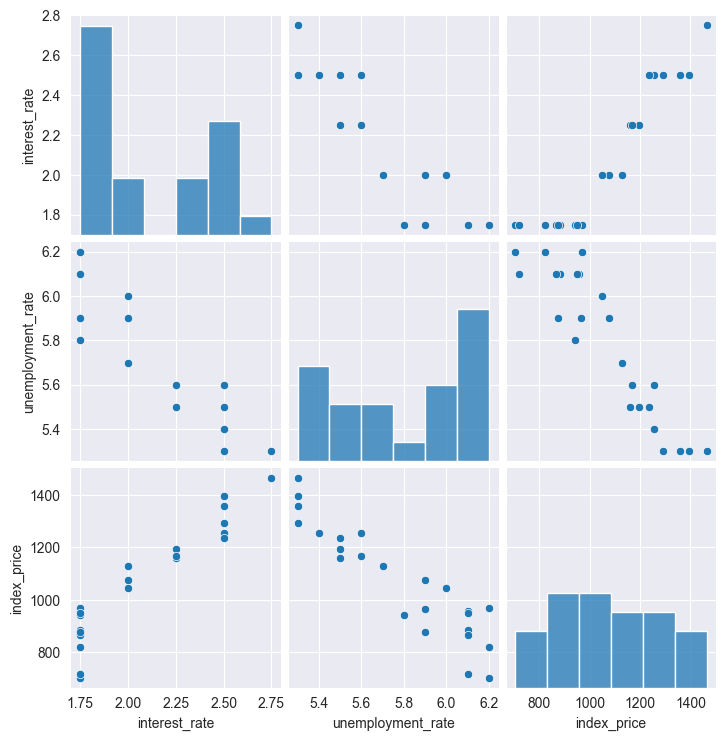

In [48]:
sns.pairplot(df_index)

In [49]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


<Axes: >

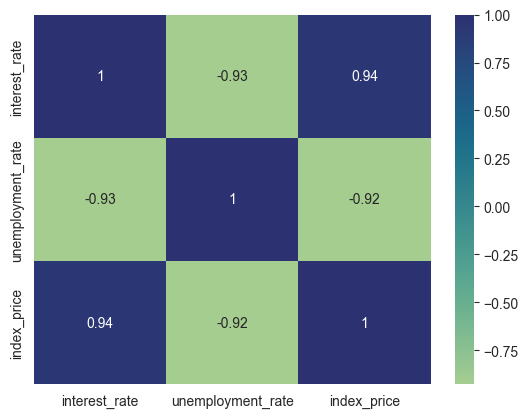

In [50]:
sns.heatmap(df_index.corr(), cmap='crest', annot=True)

Text(0, 0.5, 'Unemployment Rate')

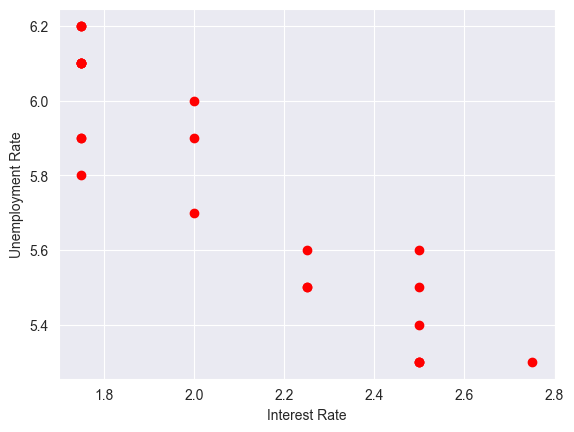

In [51]:
#Visualize data points more closely
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')

In [52]:
#Independent and Dependent features
# X=df_index.[['interest_rate','unemployment_rate']] - 1st method
X=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]

In [53]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [55]:
X.shape

(24, 2)

In [64]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

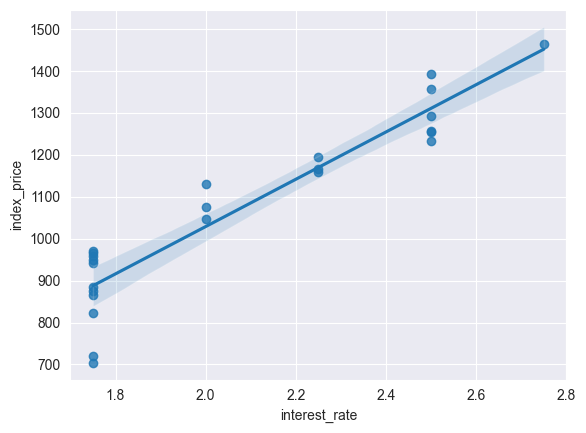

In [65]:
sns.regplot(x=df_index['interest_rate'], y=df_index['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

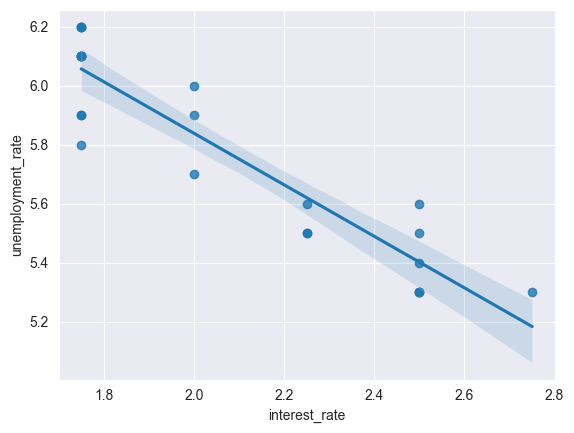

In [66]:
sns.regplot(x=df_index['interest_rate'], y=df_index['unemployment_rate'])

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

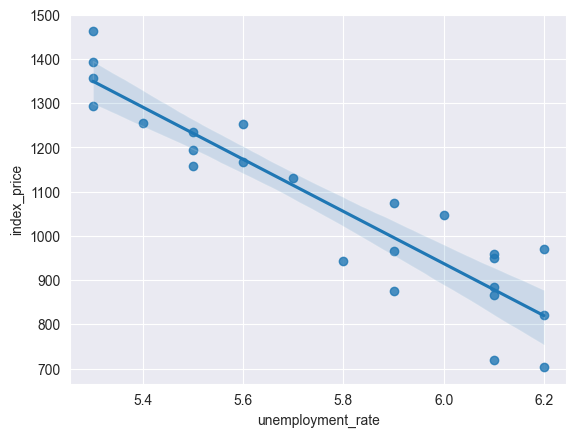

In [67]:
sns.regplot(x=df_index['unemployment_rate'], y=df_index['index_price'])

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
type(X_test)

numpy.ndarray

In [70]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
regression = LinearRegression()
regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [73]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train, y_train, scoring='neg_mean_squared_error', cv=3)

In [74]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [75]:
np.mean(validation_score)

np.float64(-5914.828180162386)

In [76]:
X_test.shape

(6, 2)

In [77]:
#prediction
y_pred= regression.predict(X_test)

In [78]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [79]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, accuracy_score
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.762887712569
59.935781523235484
76.11677139574805


In [80]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("R-squared:", score)
print("Adjusted R squared:",1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

R-squared: 0.8278978091457145
Adjusted R squared: 0.7131630152428576


## Assumptions

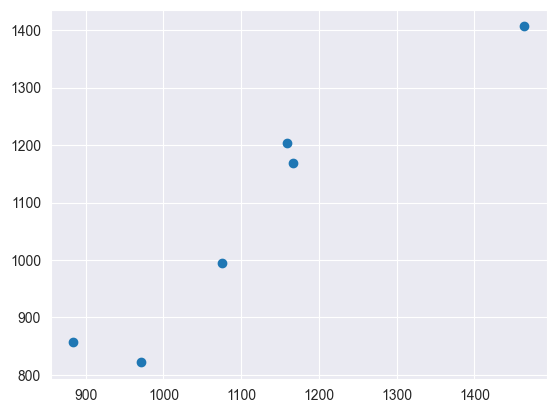

In [81]:
plt.scatter(y_test, y_pred)

In [82]:
residuals = y_test - y_pred

In [83]:
residuals

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64

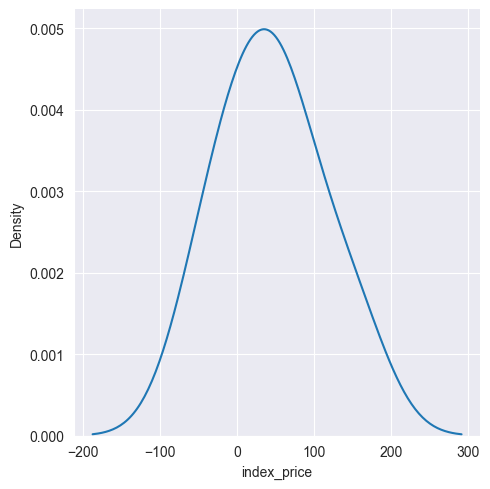

In [85]:
#Plot the residuals
sns.displot(residuals, kind='kde')

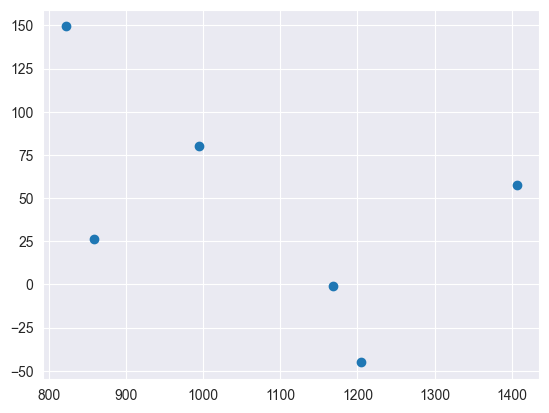

In [87]:
#Scatter plot with respect to predictions and residuals
plt.scatter(y_pred, residuals)

In [95]:
prediction = regression.predict(scaler.transform([[2.5,5.6]]))

E:\udemy\PythonBootcamp\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [96]:
prediction

array([1233.25359973])

In [101]:
regression.coef_

array([  88.27275507, -116.25716066])

In [102]:
regression.intercept_

np.float64(1053.4444444444443)

In [103]:
##OLS Linear Regression for intercept and coefficient
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()

In [104]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Wed, 19 Nov 2025   Prob (F-statistic):                       0.754
Time:                        09:27:13   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""